In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

## Review

<details><summary>1. What is the bias-variance tradeoff?</summary>
```
- Mean squared error can be decomposed into a bias component plus a variance component (plus a systematic error, but we don't have control over this part, so we often ignore it).
- The bias-variance tradeoff refers to the fact that taking steps to minimize bias usually comes at the expense of an increase in variance. Similarly, taking steps to minimize variance usually comes at the expense of an increase in bias.
```
</details>


<details><summary>2. What evidence/information would lead me to believe that my model suffers from high variance?</summary>
```
- After splitting my data into training and testing sets, if I see that my model performs way better on my training set than my testing set, this means that my model is not generalizing very well to "new" data.
- An example might be where our training MSE is substantially lower than our testing MSE, or where our training R-squared is substantially higher than our testing R-squared.
```
</details>


<details><summary>3. What term do we use to describe a model that suffers from high variance?</summary>
```
- Overfit.
```
</details>


<details><summary>4. How might we try to fix a model that suffers from high variance?</summary>
```
- Drop features.
- Make our existing features less complex. (i.e. get rid of interaction terms or higher order terms.)
- Choose a simpler model.
- Gather more data. (Although this is usually expensive and time-consuming.)
- Regularization!
```
</details>

<a id='intro'></a>

## Overview of regularization

---

**The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.**

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. There is a mixture of them called the **Elastic Net**. We will take a look at the mathematics of regularization and the effect these penalties have on model fits.


<a id='lsq-loss'></a>

## Review: Least Squares Loss Function

---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Where our model predictions $\hat{y}$ are based on the sum of the $\beta_0$ intercept and the products of $\beta_i$ with $x_i$.

What should I take away from this?

- Machine learning usually boils down to _optimization_.
- Training/fitting means _minimizing_ a "loss function" (a.k.a. cost or objective function).
- In linear regression, the loss function is RSS (or equivalently) MSE, and the optimization is performed with respect to the $\beta$ coefficients.

> Minimizing the loss function gives you the optimal $\beta$ values for your regression model!!

**Aside:**

Alternatively, in matrix notation using predictor matrix $\mathbf{X}$, residual errors $\pmb\varepsilon$, and vector of beta coefficients $\pmb\beta$:

### $$ \text{minimize:}\; RSS = \pmb\varepsilon^T \pmb\varepsilon = (\mathbf{y} - \mathbf{X}\pmb\beta)^T (\mathbf{y} - \mathbf{X}\pmb\beta) $$

<a id='effect'></a>

## What is the effect of regularization?

---

**To demonstrate the effects we will be using a dataset on wine quality.**

An important aspect of this data, which is a reason why we might choose to use regularization, is that there is **multicollinearity** in the data. The term multicollinearity means that there are _high correlations between predictor variables in your model_. 

**This can lead to a variety of problems including:**
1. The effect of predictor variables estimated by your regression will depend on what other variables are included in your model.
2. Predictors can have wildly different effects depending on the observations in your sample, and small changes in samples can result in very different estimated effects.
3. With very high multicollinearity, the inverse matrix the computer calculates may not be accurate.
    - $\hat{\pmb\beta} = (\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{X}^T\mathbf{y})$
4. We can no longer interpret a coefficient on a variable as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

> **For example:** Say I want to predict income using age and years of professional experience as predictors. Attempting to interpret a one-unit increase in age might not make sense, because age and years of professional experience are probably pretty highly correlated with one another.

The Ridge is best suited to deal with multicollinearity. Lasso also deals with multicollinearity between variables, but in a more brutal way (it "zeroes out" the less effective variable).

The Lasso is particularly useful when you have redundant or unimportant variables. If you have 1,000 variables in a dataset the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.

### Load the wine csv

This version has red and white wines concatenated together and tagged with a binary 1,0 indicator (1 is red wine). There are many other variables purportedly related to the rated quality of the wine.

In [ ]:


# replace spaces in column names and convert all columns to lowercase:

**Look at the correlation between variables.**

<a id='standardization'></a>

## Standardizing predictors is required

---

When regularizing, **it is neccessary to standardize the predictor columns before constructing the models, even the dummy coded categorical variables**.

Below we define our target variable, then normalize the columns that are not the target.

We are going to change our loss function to add a penalty. The equations for the Ridge and Lasso penalties:

### $$ \text{Ridge penalty}\; = \alpha \sum_{j=1}^p \beta_j^2$$

### $$ \text{Lasso penalty}\; = \alpha \sum_{j=1}^p |\beta_j|$$



In [ ]:
# Choose a target/dependent variable that we will predict


In [ ]:
# select all the columns that are not the target


# By subtracting the mean and dividing by the standard devation, the normalization procedure is putting 
# all of the predictor variables on the same scale (distributions with mean == 0 and standard deviation == 1)
# (Yes, we could have also used sklearn's StandardScaler.  Try it and see if you get the same answer! )


## Coding Ridge regularization

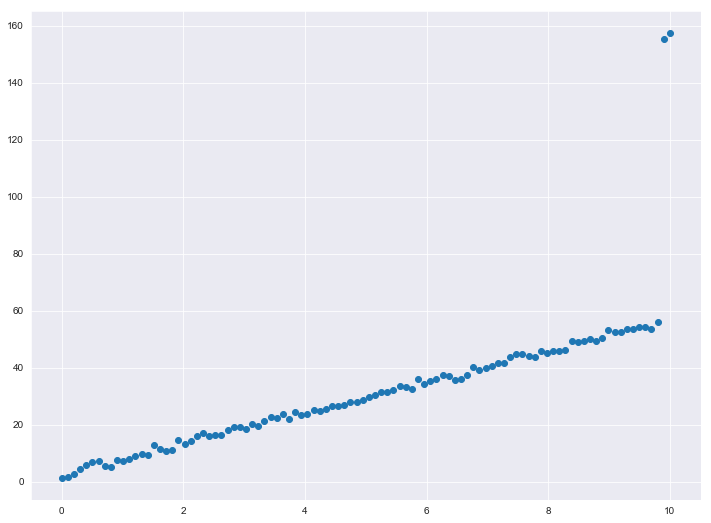

In [5]:
# Simulate data

N = 100

x = np.linspace(0, 10, N)
PHI = np.vstack((np.array([1]*N), x)).T
w_true = np.array([2.7, 5.4])

y = PHI.dot(w_true) + np.random.randn(N)
y[-1] += 100
y[-2] += 100

plt.figure(figsize = (12, 9))
plt.scatter(x, y)

In [6]:
# Fit the model

lmbda = 321.24
I_reg = np.identity(2)
I_reg[0, 0] = 0

w = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y))
w_l2 = np.linalg.solve(PHI.T.dot(PHI) + lmbda*np.identity(2), PHI.T.dot(y))

y_hat = PHI.dot(w)
y_hat_l2 = PHI.dot(w_l2)

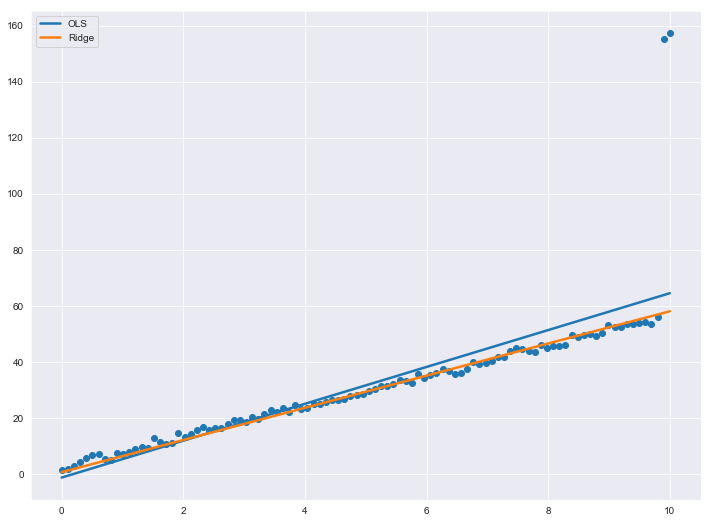

In [7]:
# Visualise the different fits

plt.figure(figsize = (12, 9))
plt.scatter(x, y)
plt.plot(x, y_hat, label = "OLS", linewidth = 2.5)
plt.plot(x, y_hat_l2, label = "Ridge", linewidth = 2.5)
plt.legend()

In [ ]:
# Report the R-squared value

R2 = 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)
R2_l2 = 1 - np.sum((y - y_hat_l2)**2) / np.sum((y - y.mean())**2)

print("OLS R-squared: {}".format(R2))
print("Ridge R-squared: {}".format(R2_l2))

<a id='viz-lasso'></a>

## Defining and Visualizing the Lasso

---

Now we do the same thing as above but for the Lasso. You will be able to see how the coefficients change differently for both!  But first, let's define lasso.

Lasso regression takes a different approach. Instead of adding the sum of squared $\beta$ coefficients to the RSS, it adds the sum of the absolute values of the $\beta$ coefficients:

### $$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\sum_{j=1}^p |\beta_j|$$

**Where:**

$|\beta_j|$ is the absolute value of the $\beta$ coefficient for variable $x_j$.

$\alpha$ is again the strength of the regularization penalty component in the loss function. 

## Coding Lasso regularization

In [ ]:
# Simulate data

N = 100
D = 100

X = np.random.randn(N, D)
PHI = np.column_stack((np.array([[1]*N]).T, X))

w_true = np.array([3.8, 5.3, 3.9] + [0]*(D - 2))

y = PHI.dot(w_true) + np.random.randn(N)

In [ ]:
# Functions

def objective(N, y, y_hat, lmda, w):
    return (1/(2*N))*np.sum((y - y_hat)**2) + (lmda/N)*np.sum(np.abs(w))

In [ ]:
w = np.random.randn(D + 1)

J = []
lmda = 25
eta = 1e-2
epochs = 1000

for t in xrange(epochs):
    w_reg = w
    w_reg[0] = 0
    y_hat = PHI.dot(w)
    J.append(objective(N, y, y_hat, lmda, w))
    w -= eta * (1/N) * (PHI.T.dot(y_hat - y) + lmda*np.sign(w_reg))
    
plt.figure(figsize = (12, 9))
plt.plot(J)

In [ ]:
# Report R-squared

R2 = 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

print("R-squared: {}".format(R2))

In [ ]:
plt.figure(figsize = (12, 9))
plt.plot(w_true, linewidth = 2.5, label = "True weights")
plt.plot(w, linewidth = 2.5, label = "Learned weights")
plt.legend()

<a id='viz-elastic-net'></a>

## Visualizing the Elastic Net



The Elastic Net combines the Ridge and Lasso penalties.  It adds *both* penalties to the loss function:

### $$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\rho\sum_{j=1}^p |\beta_j| + \alpha(1-\rho)\sum_{j=1}^p \beta_j^2$$

In the elastic net, the effect of the ridge versus the lasso is balanced by the $\rho$ parameter.  It is the ratio of Lasso penalty to Ridge penalty and must be between zero and one.

`ElasticNet` in sklearn has two parameters:
- `alpha`: the regularization strength.
- `l1_ratio`: the amount of L1 vs L2 penalty (i.e., $\rho$). An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.


<a id='model-performance'></a>

## Model performance of the Ridge, Lasso and Elastic Net on the overfit data


---

Let's check out how the penalties affect the performance of our models. On the basic wine dataset there won't be much benefit to using regularization. We can switch over to the overfit data instead to see if regularization helps us control overfitting.

**Let's start with plain vanilla linear regression:**

In [ ]:
lr_model = LinearRegression()

### Ridge Regression

**Now let's make it into a Ridge regression by adding the penalty term:**

Which $\alpha$ to choose?  Let's search!

In [8]:
from sklearn.linear_model import Ridge

In [ ]:
def plot_cv(alphas, cv_means, optimal_alpha, lr_mse, log=False):
    # alphas = list of alphas
    # cv_means = list of CV mean MSE
    # optimal_alpha
    # lr_mse
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()

    if log:
        ax.semilogx(alphas, cv_means, lw=2)
    else:
        ax.plot(alphas, cv_means, lw=2)
    ax.axvline(optimal_alpha)
    ax.axhline(lr_mse)
    ax.set_xlabel('alpha')
    ax.set_ylabel('Mean Squared Error')
    
plot_cv(ridge_model.alphas, ridge_cv_means, ridge_optimal_alpha, lr_cv_mean_mse, log=True)

Above we have seen how MSE is minimized at the optimal $\alpha$.  Let's get the corresponding value of $R^2$.

### Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

### ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV